In [1]:
# get dataset here: from https://github.com/serengil/deepface/tree/master/tests/dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from deepface.commons import functions
from deepface.commons.logger import Logger
from deepface.commons.distance import findThreshold, findEuclideanDistance, findCosineDistance

2024-01-11 12:39:37.564468: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 12:39:37.595084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 12:39:37.595124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 12:39:37.596221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 12:39:37.601705: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 12:39:37.602887: I tensorflow/core/platform/cpu_feature_guard.cc:1

24-01-11 12:39:39 - Directory /home/gitpod/.deepface created
24-01-11 12:39:39 - Directory /home/gitpod/.deepface/weights created


In [2]:
logger = Logger()

In [3]:
%%time

# build model
model_name = "Facenet"
model = DeepFace.build_model(model_name=model_name)
target_size = functions.find_target_size(model_name)
logger.info(f"target_size: {target_size}")

24-01-11 12:39:47 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /home/gitpod/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 199MB/s] 


24-01-11 12:39:48 - target_size: (160, 160)
CPU times: user 3.43 s, sys: 351 ms, total: 3.78 s
Wall time: 4.27 s


In [4]:
%%time

# load images, extract faces, and find embeddings

img1 = DeepFace.extract_faces(img_path="../dataset/img1.jpg", target_size=target_size)[0]["face"]
img1 = np.expand_dims(img1, axis=0)  # to (1, 160, 160, 3)
img1_representation = model.predict(img1)[0, :]

img2 = DeepFace.extract_faces(img_path="../dataset/img2.jpg", target_size=target_size)[0]["face"]
img2 = np.expand_dims(img2, axis=0)
img2_representation = model.predict(img2)[0, :]

print(f"Embedding size: {len(img1_representation)}")

1/1 [==============================] - 0s 48ms/step
Embedding size: 128
CPU times: user 4.82 s, sys: 678 ms, total: 5.5 s
Wall time: 2.73 s


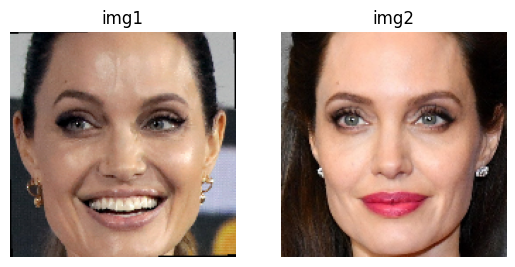

In [5]:
# plot images
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
plt.imshow(img1[0])
plt.axis("off")
plt.title("img1");

ax2 = fig.add_subplot(1, 2, 2)
plt.imshow(img2[0])
plt.axis("off")
plt.title("img2");

In [6]:
# distance between two images

distance_vector = np.square(img1_representation - img2_representation)
logger.debug(distance_vector)

distance = np.sqrt(distance_vector.sum())
logger.info(f"Euclidean distance: {distance}")

24-01-11 12:39:52 - Euclidean distance: 7.226561546325684


In [7]:
%%time

# manual verification based on distance and suggested threshold
dst = findCosineDistance(img1_representation, img2_representation)
threshold = findThreshold(model_name=model_name, distance_metric="cosine")

print(f"Distance: {dst}")
print(f"Threshold: {threshold}")
print(f"Verified: {dst <= threshold}")

Distance: 0.2039353847503662
Threshold: 0.4
Verified: True
CPU times: user 246 µs, sys: 46 µs, total: 292 µs
Wall time: 279 µs


In [8]:
# quick helper function for verification
DeepFace.verify(
    img1_path="../dataset/img1.jpg",
    img2_path="../dataset/img3.jpg",
    model_name=model_name,
    distance_metric="cosine",
)

{'verified': False,
 'distance': 0.9436459908300012,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769},
  'img2': {'x': 363, 'y': 349, 'w': 835, 'h': 835}},
 'time': 1.84}

In [44]:
# quick helper function for analyzing face
res = DeepFace.analyze(
    img_path="../dataset/img1.jpg",
    actions=("emotion", "age", "gender", "race"),
    detector_backend="mtcnn",
)

keys_to_get = ["dominant_emotion", "dominant_race", "dominant_gender", "age"]
summary = [res[0][key] for key in keys_to_get]
summary

1/1 [==============================] - 0s 19ms/step


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]  


['happy', 'white', 'Woman', 30]